# <FONT COLOR='DARKBLUE'> **FRUITS AND VEGETABLES IMAGE CLASSIFICATION**

In [1]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## **Downloading the dataset**

In [2]:
# downloading the dataset from kaggle using API
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:19<00:00, 32.3MB/s]
100% 1.98G/1.98G [00:19<00:00, 110MB/s] 


In [ ]:
# Unzipping the zipped dataset
!unzip /content/fruit-and-vegetable-image-recognition.zip

### **Importing Required Libraries**

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### **Data Processing**
#### **Training Image Preprocessing**

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels='inferred',  # Inferring labels from subdirectories
    label_mode='categorical',  # Using categorical labels
    class_names=None,  # Class names will be inferred from subdirectories
    color_mode='rgb',  # Color mode is RGB
    batch_size=32,  # Batch size of 32
    image_size=(64, 64),  # Resizing images to 64x64
    shuffle=True,  # Shuffling the dataset
    seed=None,  # Random seed for shuffling
    validation_split=None,  # No validation split specified
    subset=None,  # No subset specified
    interpolation='bilinear',  # Interpolation method for resizing
    follow_links=False,  # Not following symbolic links
    crop_to_aspect_ratio=False  # Not cropping images to aspect ratio
)

Found 3115 files belonging to 36 classes.


#### **Validation Image Preprocessing**

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels='inferred',  # Inferring labels from subdirectories
    label_mode='categorical',  # Using categorical labels
    class_names=None,  # Class names will be inferred from subdirectories
    color_mode='rgb',  # Color mode is RGB
    batch_size=32,  # Batch size of 32
    image_size=(64, 64),  # Resizing images to 64x64
    shuffle=True,  # Shuffling the dataset
    seed=None,  # Random seed for shuffling
    validation_split=None,  # No validation split specified
    subset=None,  # No subset specified
    interpolation='bilinear',  # Interpolation method for resizing
    follow_links=False,  # Not following symbolic links
    crop_to_aspect_ratio=False  # Not cropping images to aspect ratio
)

Found 351 files belonging to 36 classes.


### **Setting up the directory**

In [7]:
import os
# project name
project_name = 'Fruits_and_Vegetables_classification'


# List your models
model_names = [
    'Custom_CNN_From_Scratch',
    'Custom_CNN_With_Tuning',
]

# Base directory (in this case, your Google Colab workspace)
base_dir = '/content/'

# Create the project directory
project_dir = os.path.join(base_dir, project_name)
os.makedirs(project_dir, exist_ok=True)

# Create a subdirectory for each model
for each_model in model_names:
    model_dir = os.path.join(project_dir, each_model)
    os.makedirs(model_dir, exist_ok=True)
    # Example subdirectories for model-related files
    # os.makedirs(os.path.join(model_dir, 'checkpoints'), exist_ok=True)
    # os.makedirs(os.path.join(model_dir, 'logs'), exist_ok=True)
    # os.makedirs(os.path.join(model_dir, 'saved_models'), exist_ok=True)

print(f'Project directory structure created at: {project_dir}')


Project directory structure created at: /content/Fruits_and_Vegetables_classification


### **Data Analysis**
#### **Plotting five images from each class**

In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

def plot_images_from_folders(directory, num_images=5):
    # Getting the sorted list of class names from the directory
    class_names = sorted(os.listdir(directory))
    num_classes = len(class_names)

    # Creating a figure to plot the images
    fig, axes = plt.subplots(num_classes, num_images, figsize=(num_images*3, num_classes*3))
    fig.subplots_adjust(hspace=0.5)

    # Iterating over each class and plotting images
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(directory, class_name)
        image_paths = glob(os.path.join(class_path, '*'))

        # Plotting up to num_images images for each class
        for img_index in range(min(num_images, len(image_paths))):
            img_path = image_paths[img_index]
            img = mpimg.imread(img_path)

            # Getting the correct axis based on the number of classes
            ax = axes[class_index, img_index] if num_classes > 1 else axes[img_index]

            # Plotting the image and setting title
            ax.imshow(img)
            ax.axis('off')  # Turning off axis
            if img_index == 0:
                ax.set_title(class_name, size=12)

    plt.tight_layout()  # Adjusting layout for better appearance
    plt.show()  # Displaying the plot

In [ ]:
# calling the function to display five images from each class
plot_images_from_folders(train_dir, num_images=5)


### **Let's count the images from each different class**

In [10]:
# creating a function which will count images from each folders
def count_images_from_directory(directory):
  class_names = sorted(os.listdir(directory))
  class_counts = {}

  for class_name in class_names:
    class_path = os.path.join(directory, class_name)
    image_count = len(os.listdir(class_path))
    class_counts[class_name] = image_count
  return class_counts

# function for plotting
def plot_class_distribution(class_counts, title):
  classes = list(class_counts.keys())
  counts = list(class_counts.values())

# plotting the bar plot
  plt.figure(figsize=(15, 7))
  bars = plt.bar(classes, counts, color='skyblue')
  plt.xlabel('classes')
  plt.ylabel('Number of Images')
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
train_counts = count_images_from_directory(train_dir)
plot_class_distribution(train_counts, 'Train Set Class Distribution')


### **Checking the images shapes before building the model**

In [ ]:
import os
import cv2

# Define the path to the train directory
train_dir = '/content/train'

# Get the list of subdirectories (classes)
sub_dirs = os.listdir(train_dir)

# Iterate over each subdirectory (class)
for sub_dir in sub_dirs:
    sub_dir_path = os.path.join(train_dir, sub_dir)

    # Get the list of image files in the subdirectory
    image_files = os.listdir(sub_dir_path)

    # Iterate over each image file
    for image_file in image_files:
        image_path = os.path.join(sub_dir_path, image_file)

        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # If the image is loaded successfully, print its pixel values
        if img is not None:
            print(f"{image_file} Shape:", img.shape)
        else:
            print(f"The image {image_path} could not be loaded. Please check the path and file permissions.")


### **Building Model**

In [13]:
model = tf.keras.Sequential()
# Convolutional Layers - where the information from the images are extracted
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape = (64, 64, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Dropout(0.5)) # adding dropout layer to prevent model from overfitting
model.add(tf.keras.layers.Flatten()) # flattening the tensor to 1d array to feed the ANN layers with image data

# Artificial Neural Networks
model.add(tf.keras.layers.Dense(units=128, activation='relu')) # a simple ANN layer to to train, with an activation function of relu
model.add(tf.keras.layers.Dense(units=36, activation='softmax')) # Output layer with an activation function of softmax

In [14]:
# Compiling the model with Root mean square optimizer, loss categorical crossentropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Checking the model summary
model.summary()

In [ ]:
# Training the model 30 times
history = model.fit(training_set, validation_data = validation_set, epochs = 30)

### **Model's Perfomance visually**

In [29]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

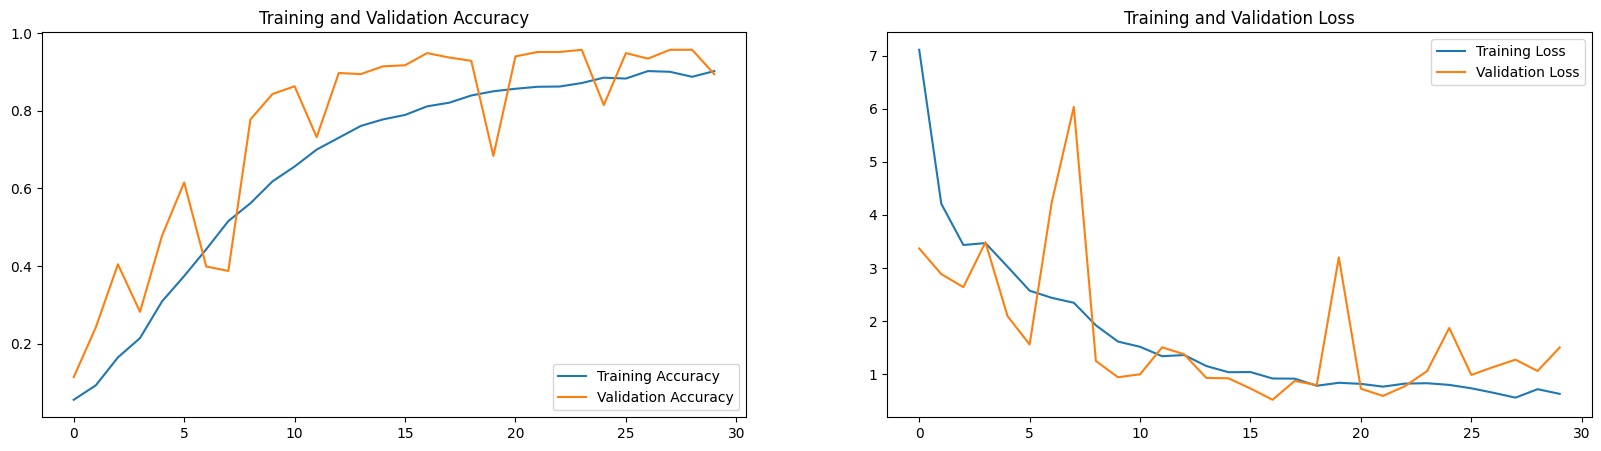

In [18]:
# plotting the model's performance by calling the function
plot_training_history(history)

**We can see the model is fluctuating to converge let's evaluate the model**

### **Model Evaluation**

In [21]:
# printing the model's performance
print("Validation set accuracy", history.history['val_accuracy'][-1]*100)

Validation set accuracy 89.45869207382202


**Our Model is displaying the problem of underfitting, let's increase the model's complexity**

In [22]:
model = tf.keras.models.Sequential()

# Adding the first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Adding the second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Adding max pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding another convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Adding another convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Adding max pooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening the output before passing it to the fully connected layers
model.add(tf.keras.layers.Flatten())

# Adding a dense (fully connected) layer with 512 units
model.add(tf.keras.layers.Dense(units=512, activation='relu'))

# Adding a dense (fully connected) layer with 256 units
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Adding dropout layer to reduce overfitting
model.add(tf.keras.layers.Dropout(0.5))

# Adding the output layer with 36 units and softmax activation for multi-class classification
model.add(tf.keras.layers.Dense(units=36, activation='softmax'))


In [23]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Printing the model's params
model.summary()

In [24]:
# File path for the model checkpoint
cnn_path = '/content/Fruits_and_Vegetables_classification/Custom_CNN_With_Augmentation'
name = 'Custom_CNN_model.keras'
chk_path = os.path.join(cnn_path, name)
chk_path

'/content/Fruits_and_Vegetables_classification/Custom_CNN_With_Augmentation/Custom_CNN_model.keras'

### **Plotting the model's params**

In [ ]:
# importing keras utlity and plotting the model's parameters and storing that image in our directory
from keras.utils import plot_model
plot_model(model, to_file = '/content/Fruits_and_Vegetables_classification/Custom_CNN_With_Augmentation/Architecture.png',
           show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=training_set, validation_data=validation_set, epochs=32)

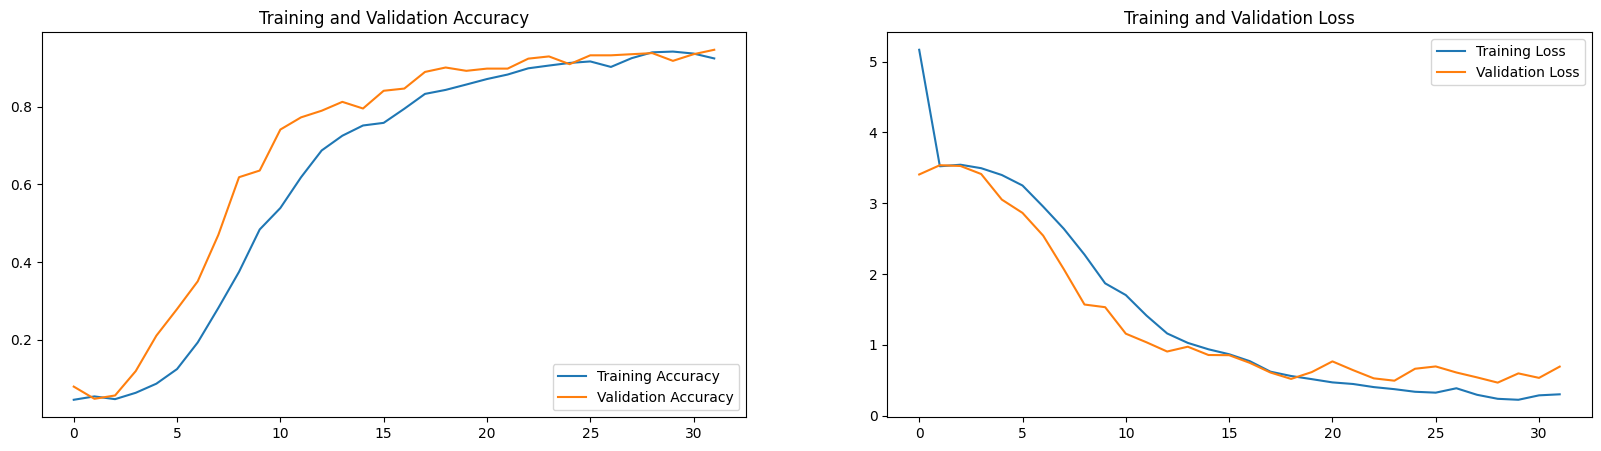

In [28]:
# plotting the model's performance
plot_training_history(history)

### **Evaluating the model**

In [31]:
# printing the accuracy and loss of training data as well as validation data
training_loss, training_accuracy = model.evaluate(training_set)
validation_loss, validation_accuracy = model.evaluate(validation_set)

11/11 [==============================] - 15s 272ms/step - loss: 0.6913 - accuracy: 0.9459


### **Test data evaluation**

In [33]:
# test generators
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64, 64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [34]:
# evaluating the test dataset
test_loss, test_accuracy = model.evaluate(test_set)

12/12 [==============================] - 13s 305ms/step - loss: 0.6798 - accuracy: 0.9471


### **Plotting Confusion Matrix**

1/1 [==============================] - 0s 71ms/step


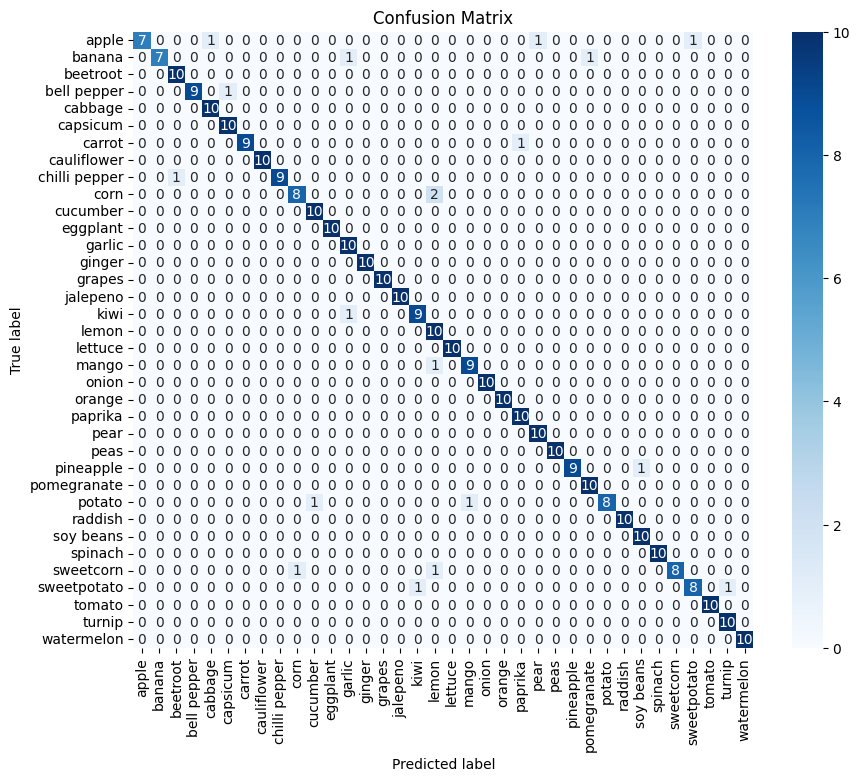

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming training_set.class_names returns the class names
class_labels = training_set.class_names

# Initializing lists to store true and predicted classes
true_classes = []
predicted_classes = []

# Iterating over the test dataset to get true labels and predictions
for images, labels in test_set:
    true_classes.extend(np.argmax(labels.numpy(), axis=1))
    predicted_classes.extend(np.argmax(model.predict(images), axis=1))

# Converting to numpy arrays
true_classes = np.array(true_classes)
predicted_classes = np.array(predicted_classes)

# Generating the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [48]:
# Printing the classification report
from sklearn.metrics import classification_report
report = classification_report(true_classes,
                               predicted_classes,
                               target_names=class_labels,
                               zero_division=0)
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.78      0.88         9
     beetroot       0.91      1.00      0.95        10
  bell pepper       1.00      0.90      0.95        10
      cabbage       0.91      1.00      0.95        10
     capsicum       0.91      1.00      0.95        10
       carrot       1.00      0.90      0.95        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       0.89      0.80      0.84        10
     cucumber       0.91      1.00      0.95        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.83      1.00      0.91        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       0.90      0.90      

1/1 [==============================] - 0s 50ms/step


<ipython-input-53-a7bf4e1391f1>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes).colors  # Get a color map with enough colors


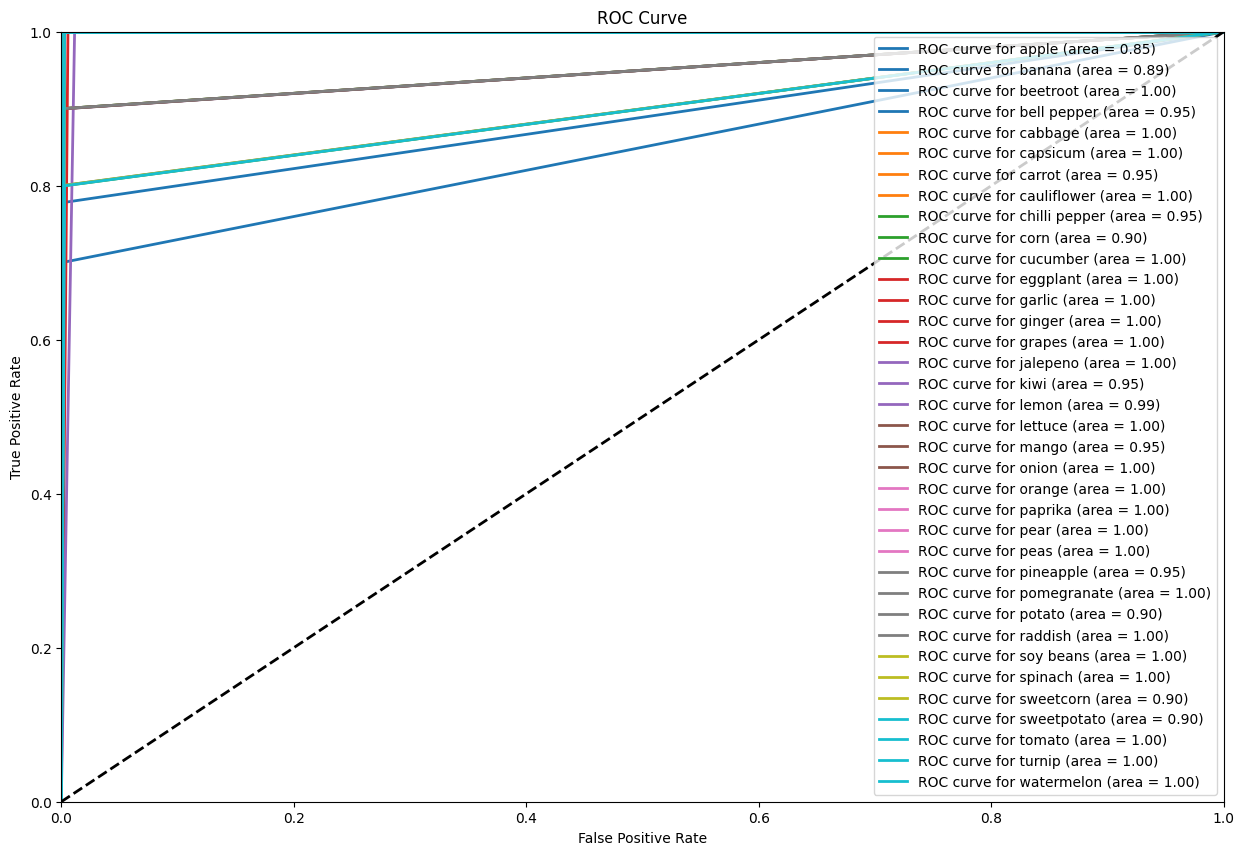

In [53]:
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Assuming class_labels are obtained from training_set
class_labels = training_set.class_names
num_classes = len(class_labels)

# Initializing lists to store true and predicted classes
true_labels = []
pred_labels = []

# Iterating over the test dataset to get true labels and predictions
for images, labels in test_set:
    true_labels.extend(np.argmax(labels.numpy(), axis=1))
    predictions = model.predict(images)
    pred_labels.extend(np.argmax(predictions, axis=1))

# Converting lists to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Encoding the labels for ROC calculation
y_encoded = pd.get_dummies(true_labels).astype(int).values
preds_encoded = pd.get_dummies(pred_labels).astype(int).values

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:, i], preds_encoded[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(15, 10))
colors = plt.cm.get_cmap('tab10', num_classes).colors  # Get a color map with enough colors

for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f"ROC curve for {class_labels[i]} (area = {roc_auc[i]:0.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Visualizing the model's predictions

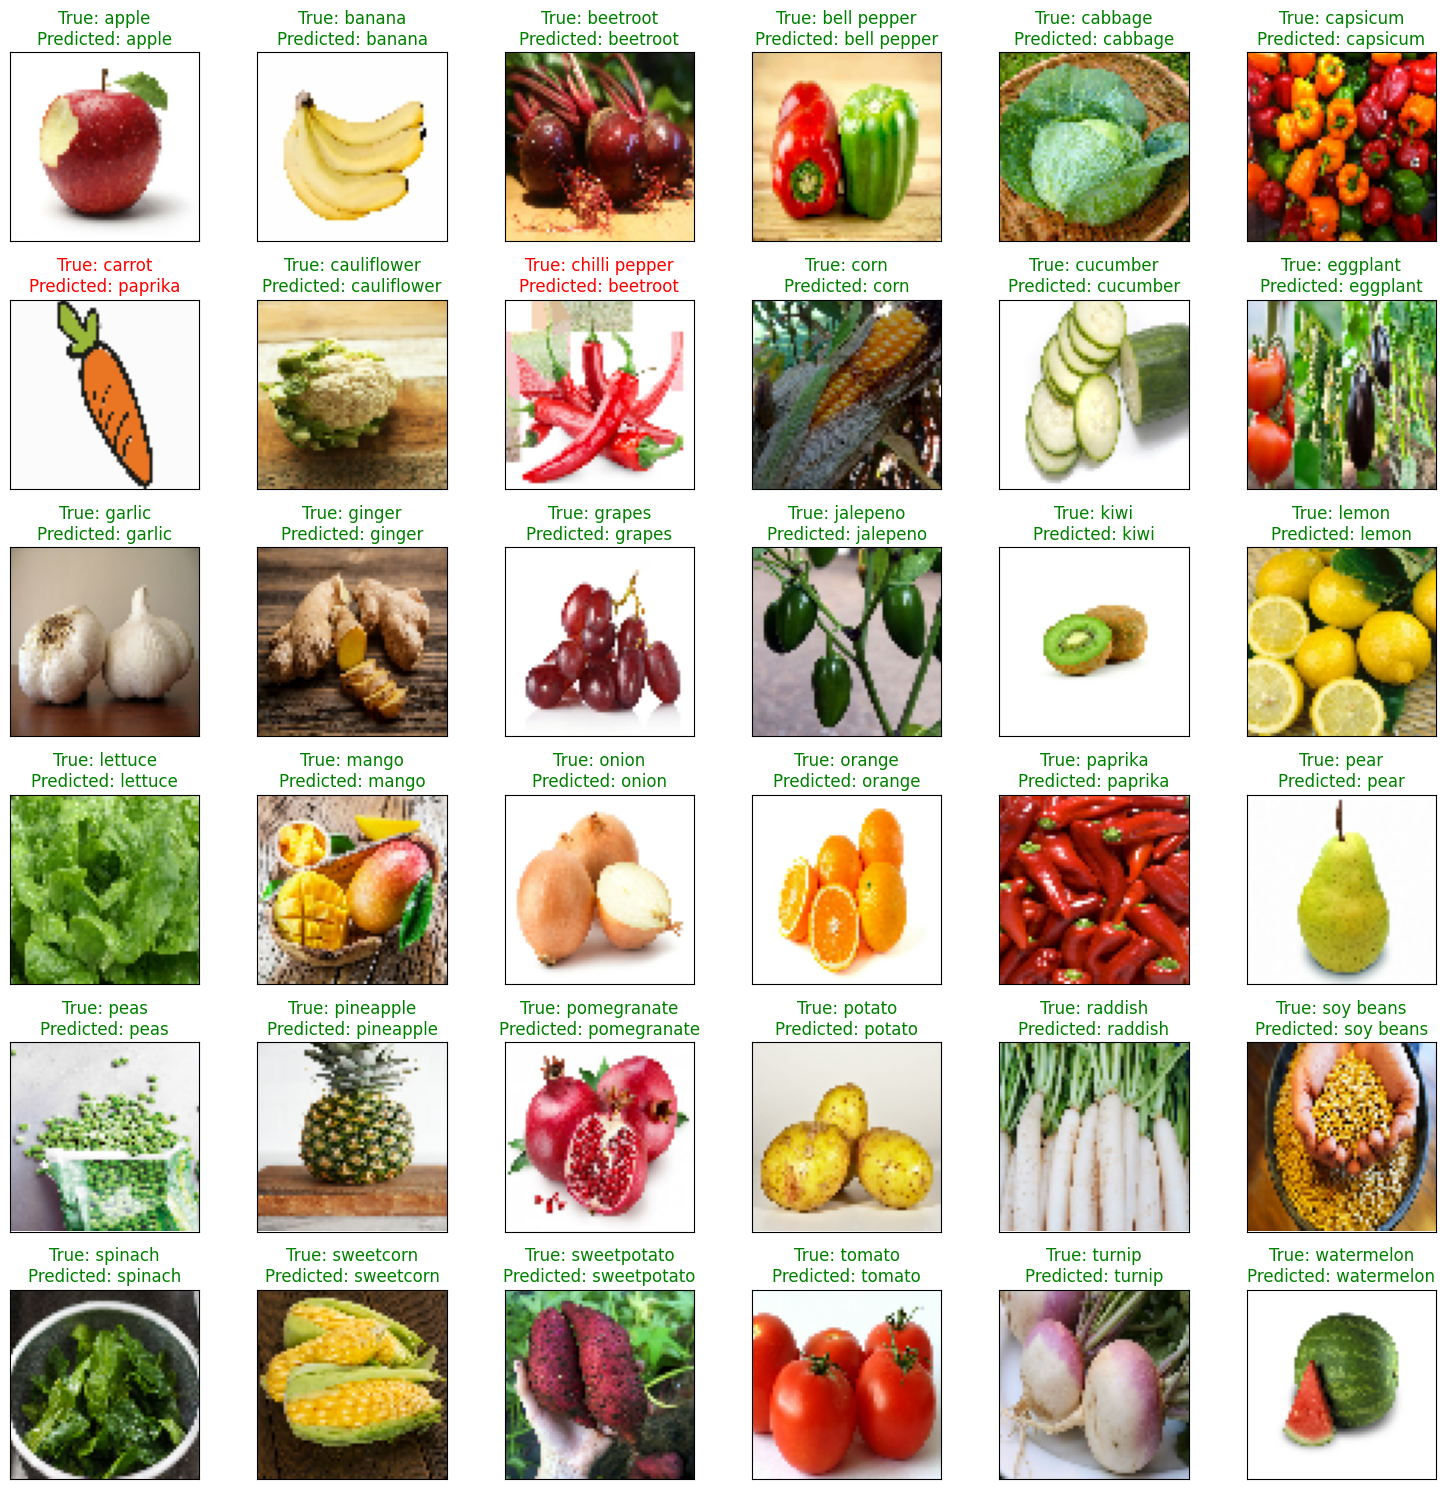

In [44]:
from collections import defaultdict

# Fruits and veggies classes from dataset
data_classes = training_set.class_names
num_classes = len(data_classes)

# Dictionary to store images by class
images_by_class = defaultdict(list)

# Iterate over the test set and collect images for each class
for batch in test_set:
    images, labels = batch
    for img, label in zip(images, labels):
        class_idx = np.argmax(label.numpy())
        images_by_class[class_idx].append(img.numpy())
        # Stop when we have at least one image for each class
        if all(len(images_by_class[i]) > 0 for i in range(num_classes)):
            break
    if all(len(images_by_class[i]) > 0 for i in range(num_classes)):
        break

# Randomly selecting one image from each class
selected_images = [images_by_class[i][0] for i in range(num_classes)]

# Setting up the plot
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i >= num_classes:
        break
    random_img = selected_images[i]
    random_img_label = i  # class index is i since we selected one per class

    # Making a prediction using the model
    model_prediction = np.argmax(model.predict(tf.expand_dims(random_img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(random_img.astype("uint8"))  # Assuming the images are RGB
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if data_classes[random_img_label] == data_classes[model_prediction] else "red"
    ax.set_title(f"True: {data_classes[random_img_label]}\nPredicted: {data_classes[model_prediction]}", color=color)

plt.tight_layout()
plt.show()

**`Observation`**: Our model has learned the spatial informaton from the images and returned best predictions so far. Now there is no need to fine tune we'll save this model and start buidling web application

### **Saving our model**

In [45]:
# Saving the model into our directory
model.save('/content/Fruits_and_Vegetables_classification/Custom_CNN_With_Augmentation/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
# Recording the training history
import json
with open('training_hist2.json', 'w') as f:
  json.dump(history.history,f)

### **Pushing all our models to Drive for easy access**

In [58]:
from google.colab import drive
drive.mount('/content/drive')


!cp -r /content/Fruits_and_Vegetables_classification /content/drive/MyDrive/

Mounted at /content/drive


# <FONT COLOR='DARKBLUE'> **CONCLUSION**